# Experiments with COSMOS Dataset

### Import the required Libraries

In [1]:
import numpy as np
from torch import nn
from torchvision import transforms
from torchvision.ops.boxes import box_iou
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import average_precision_score, roc_curve, auc

from dictlearn import DictLearn
from lasso import LASSO
from utils import *

### Loading the features / images / dictionaries

In [2]:
root = r"./data/COSMOS_Data/CVAT_Patches/"

selected_indices = np.random.choice(1101, 500, replace=False)
D = np.load(root + "train_dict_new.npy")
y = np.load(root + "test_dict_new.npy")
Df = np.load(root + "train_feats_new.npy")
yf = np.load(root + "test_feats_new.npy")
Dl = np.load(root + "train_labels_new.npy")
yl = np.load(root + "test_labels_new.npy")

D.shape, y.shape, Dl.shape, yl.shape, Df.shape, yf.shape

((1101, 64, 64), (946, 64, 64), (1101,), (946,), (1101, 2048), (946, 2048))

## ResNet Features With LASSO

Proximal SGD Optimizer

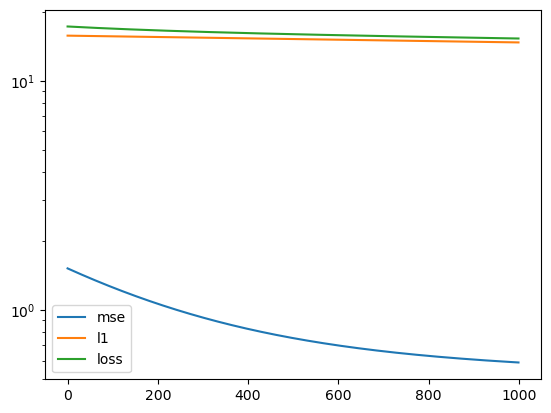

In [3]:
lasso = LASSO(optim="ProxSGD").fit(Df)
x, hists = lasso.transform(yf, 1e-3, 1000, lr=1e-3)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

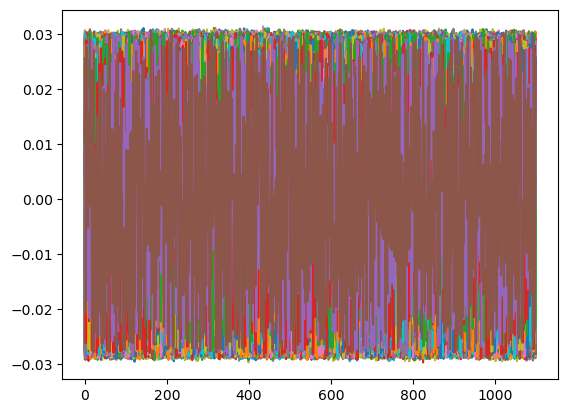

In [4]:
plt.plot(x.numpy().T)
plt.show()

Text(0, 0.5, 'SCI')

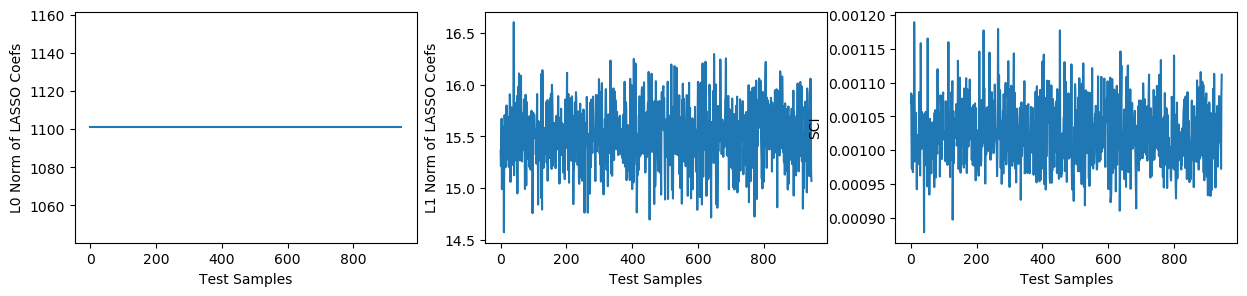

In [5]:
l0 = np.linalg.norm(x, ord=0, axis=1)
l1 = np.linalg.norm(x, ord=1, axis=1)
s = sci1(x.numpy())

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].plot(l0)
ax[0].set_xlabel("Test Samples")
ax[0].set_ylabel("L0 Norm of LASSO Coefs")
ax[1].plot(l1)
ax[1].set_xlabel("Test Samples")
ax[1].set_ylabel("L1 Norm of LASSO Coefs")
ax[2].plot(s)
ax[2].set_xlabel("Test Samples")
ax[2].set_ylabel("SCI")

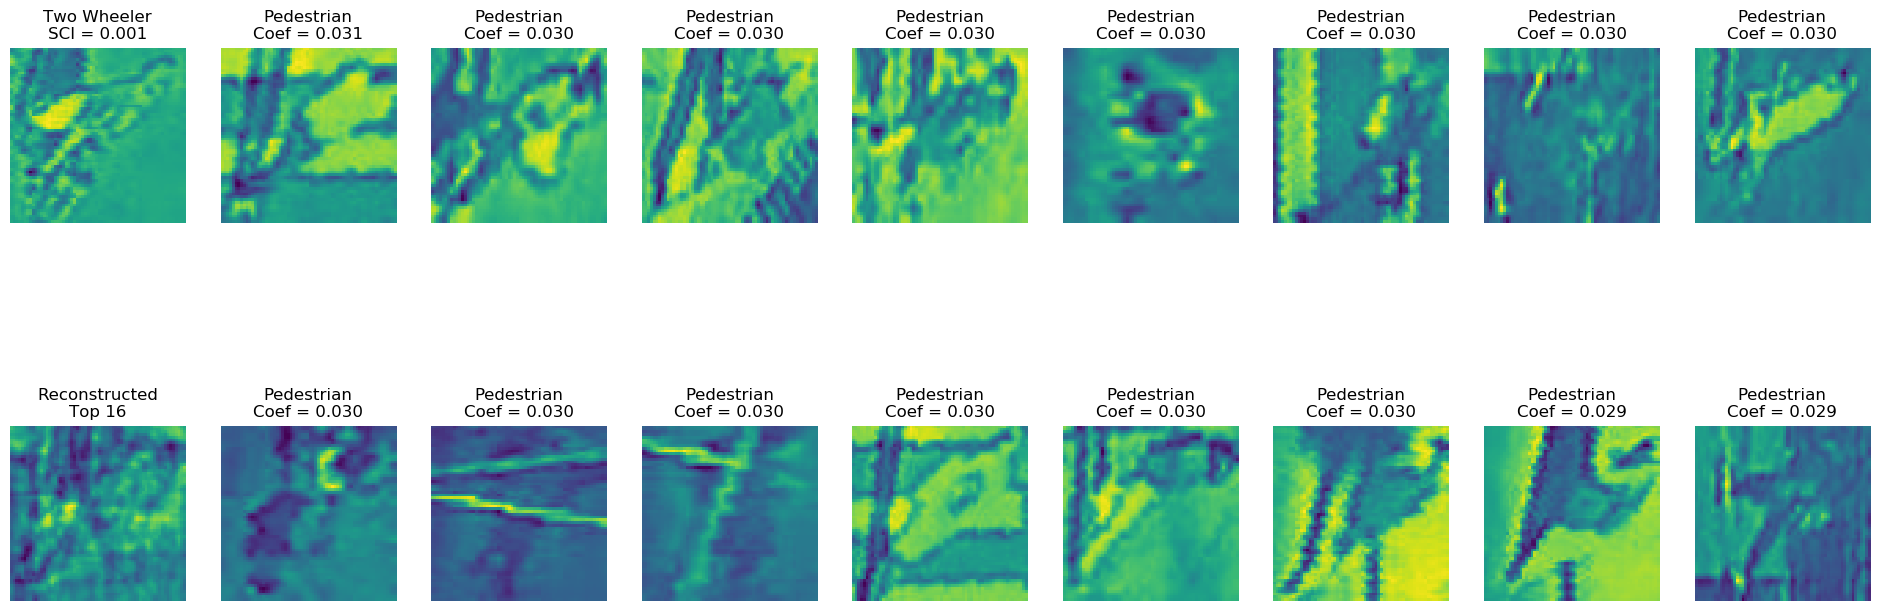

In [6]:
show_topk(x, D, Dl, y, yl, s, 54, 16)

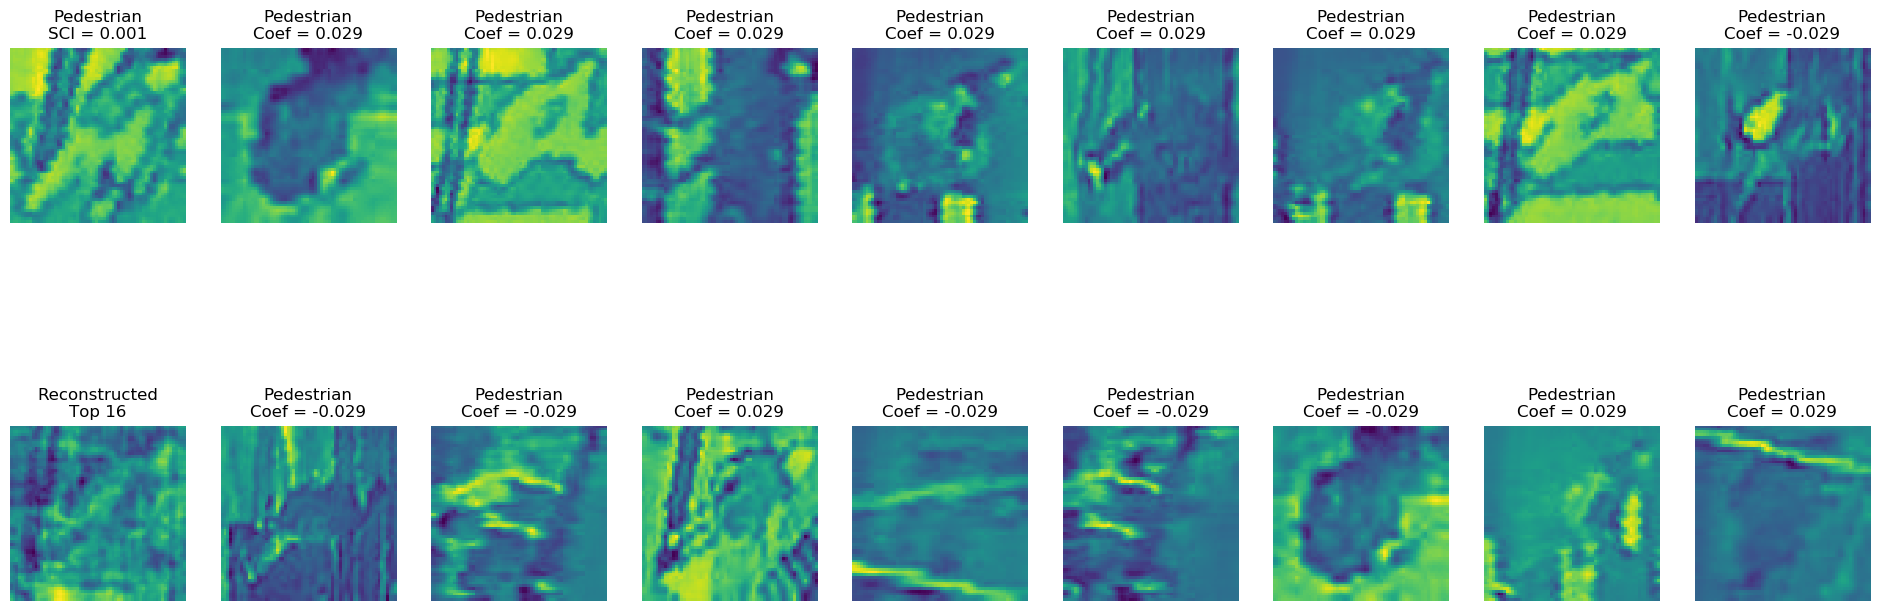

In [7]:
show_topk(x, D, Dl, y, yl, s, -10, 16)

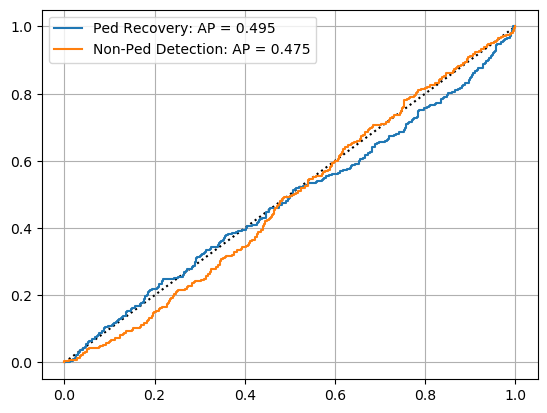

In [8]:
ss = s / s.max()
y_score = ss
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

y_true = y_ped
fpr1, tpr1, _ = roc_curve(y_true, y_score)
ap1 = average_precision_score(y_true, y_score)
plt.plot(fpr1, tpr1, label="Ped Recovery: AP = {:.3f}".format(ap1))

fpr2, tpr2, _ = roc_curve(~y_true, 1 - y_score)
ap2 = average_precision_score(~y_true, 1 - y_score)
plt.plot(fpr2, tpr2, label="Non-Ped Detection: AP = {:.3f}".format(ap2))

plt.legend()
plt.grid("on")

Proximal Adam Optimizer

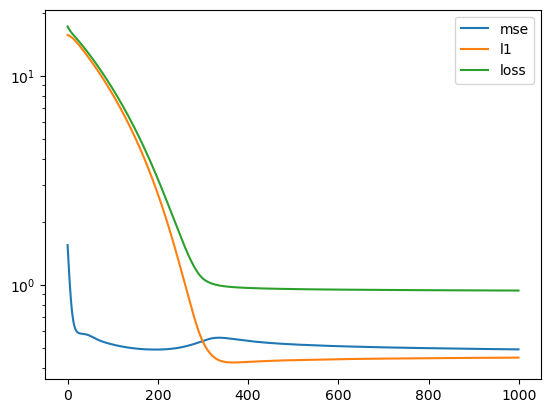

In [9]:
lasso = LASSO(optim="ProxAdam").fit(Df)
x, hists = lasso.transform(yf, 1e-3, 1000, lr=1e-4)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

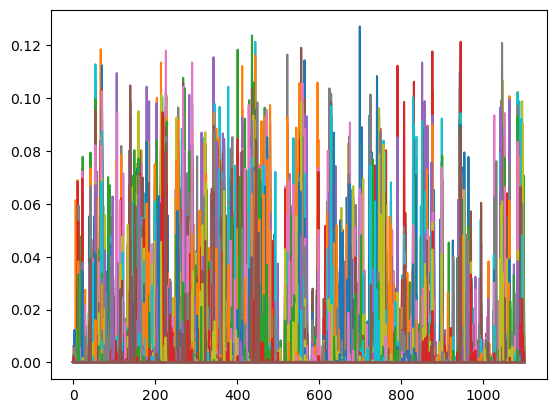

In [10]:
plt.plot(x.numpy().T)
plt.show()

Text(0, 0.5, 'SCI')

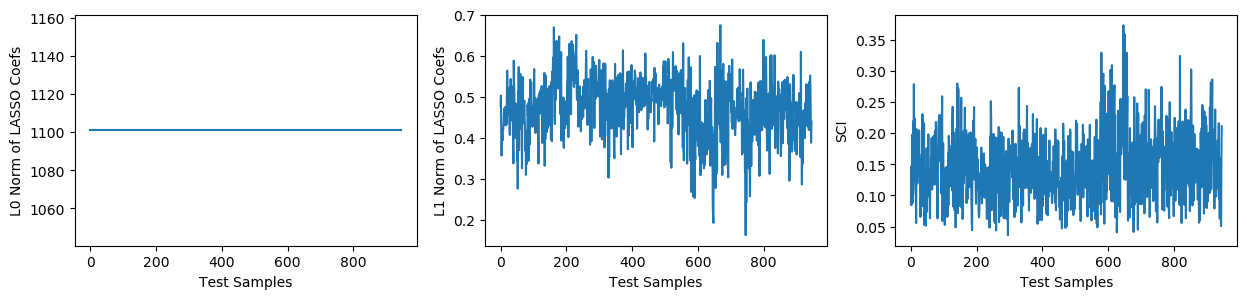

In [11]:
l0 = np.linalg.norm(x, ord=0, axis=1)
l1 = np.linalg.norm(x, ord=1, axis=1)
s = sci1(x.numpy())

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].plot(l0)
ax[0].set_xlabel("Test Samples")
ax[0].set_ylabel("L0 Norm of LASSO Coefs")
ax[1].plot(l1)
ax[1].set_xlabel("Test Samples")
ax[1].set_ylabel("L1 Norm of LASSO Coefs")
ax[2].plot(s)
ax[2].set_xlabel("Test Samples")
ax[2].set_ylabel("SCI")

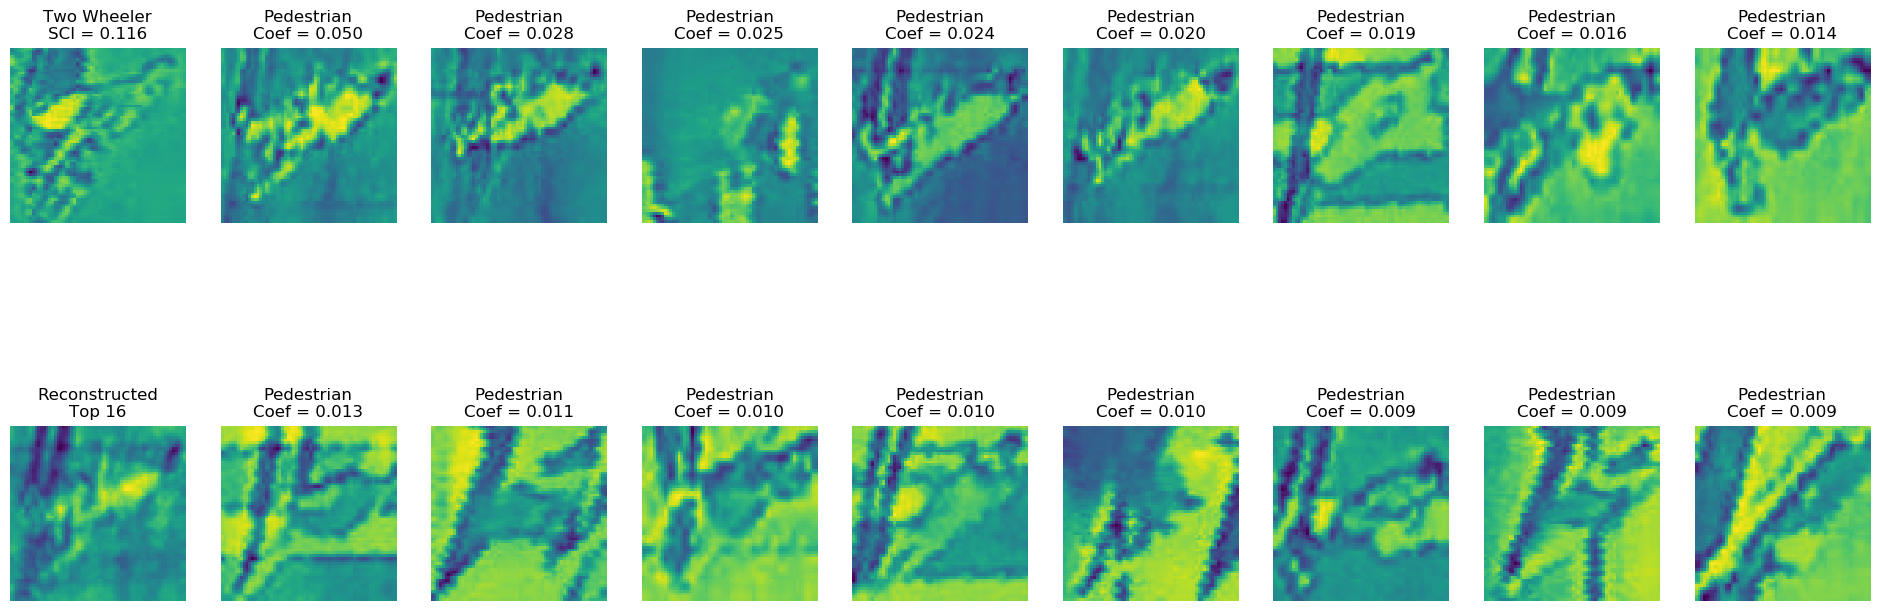

In [12]:
show_topk(x, D, Dl, y, yl, s, 54, 16)

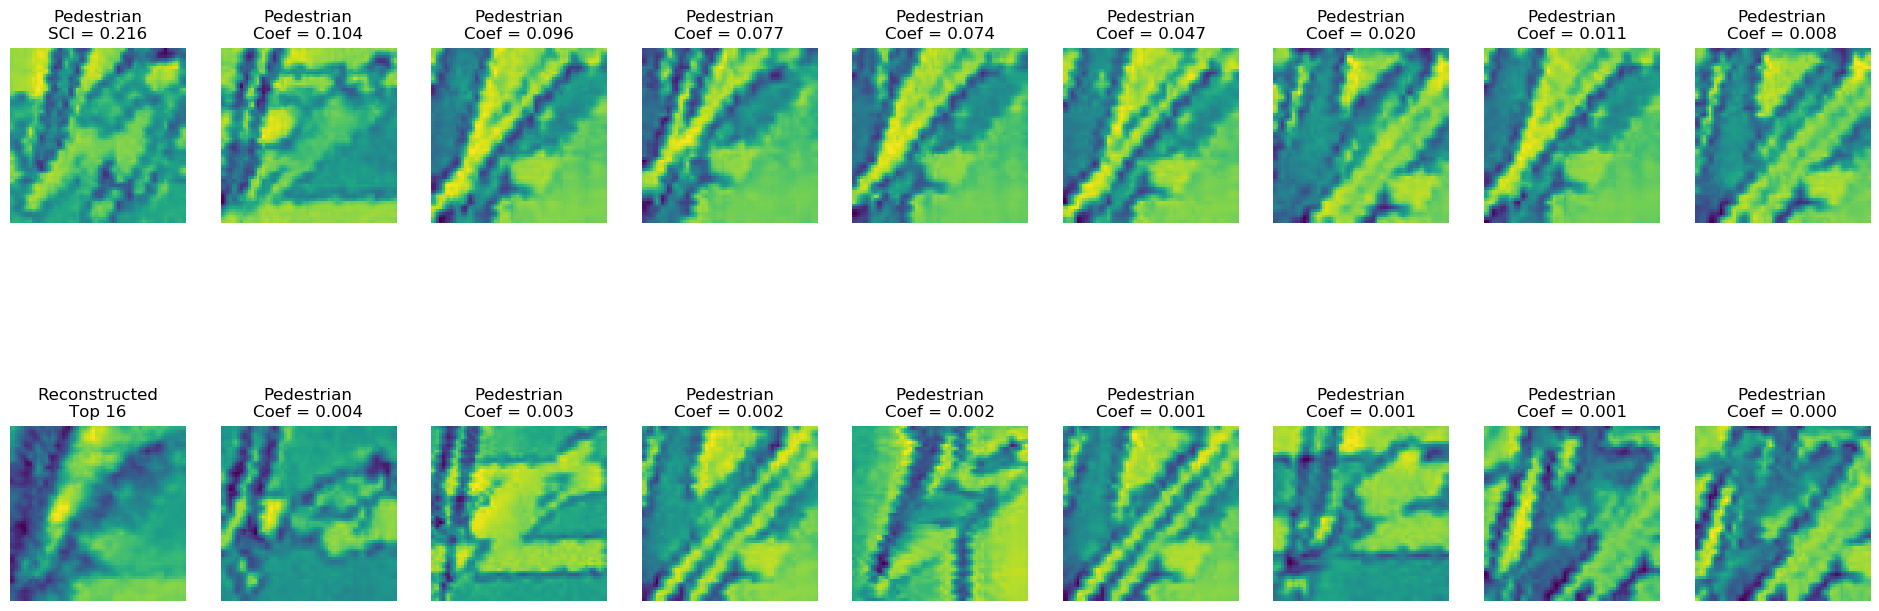

In [13]:
show_topk(x, D, Dl, y, yl, s, -10, 16)

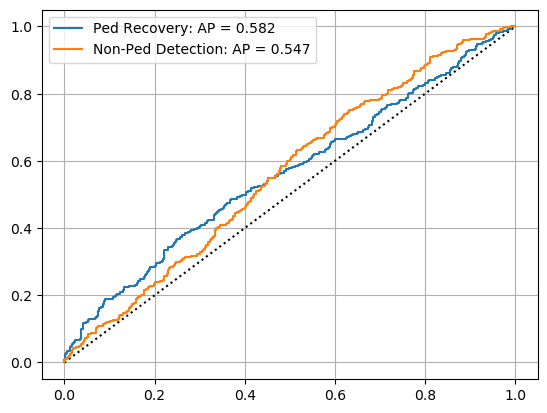

In [14]:
ss = s / s.max()
y_score = ss
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

y_true = y_ped
fpr1, tpr1, _ = roc_curve(y_true, y_score)
ap1 = average_precision_score(y_true, y_score)
plt.plot(fpr1, tpr1, label="Ped Recovery: AP = {:.3f}".format(ap1))

fpr2, tpr2, _ = roc_curve(~y_true, 1 - y_score)
ap2 = average_precision_score(~y_true, 1 - y_score)
plt.plot(fpr2, tpr2, label="Non-Ped Detection: AP = {:.3f}".format(ap2))

plt.legend()
plt.grid("on")

## Raw Images With LASSO

### Proximal SGD

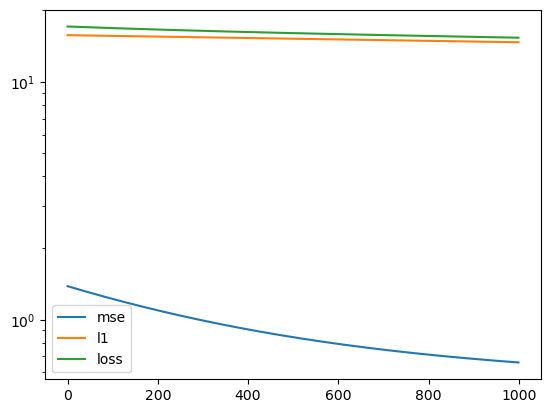

In [15]:
lasso = LASSO(optim="ProxSGD").fit(D)
x, hists = lasso.transform(y, 1e-3, 1000, lr=1e-3)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

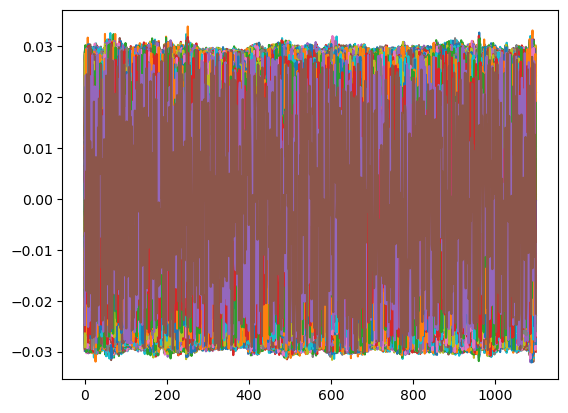

In [16]:
plt.plot(x.numpy().T)
plt.show()

Text(0, 0.5, 'SCI')

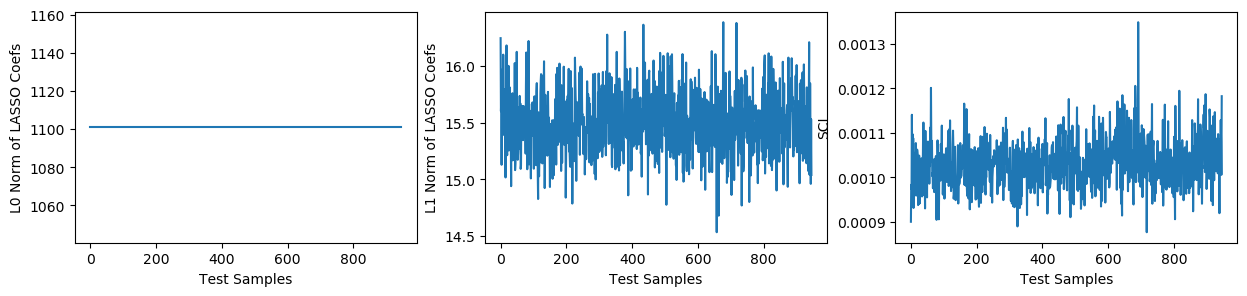

In [17]:
l0 = np.linalg.norm(x, ord=0, axis=1)
l1 = np.linalg.norm(x, ord=1, axis=1)
s = sci1(x.numpy())

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].plot(l0)
ax[0].set_xlabel("Test Samples")
ax[0].set_ylabel("L0 Norm of LASSO Coefs")
ax[1].plot(l1)
ax[1].set_xlabel("Test Samples")
ax[1].set_ylabel("L1 Norm of LASSO Coefs")
ax[2].plot(s)
ax[2].set_xlabel("Test Samples")
ax[2].set_ylabel("SCI")

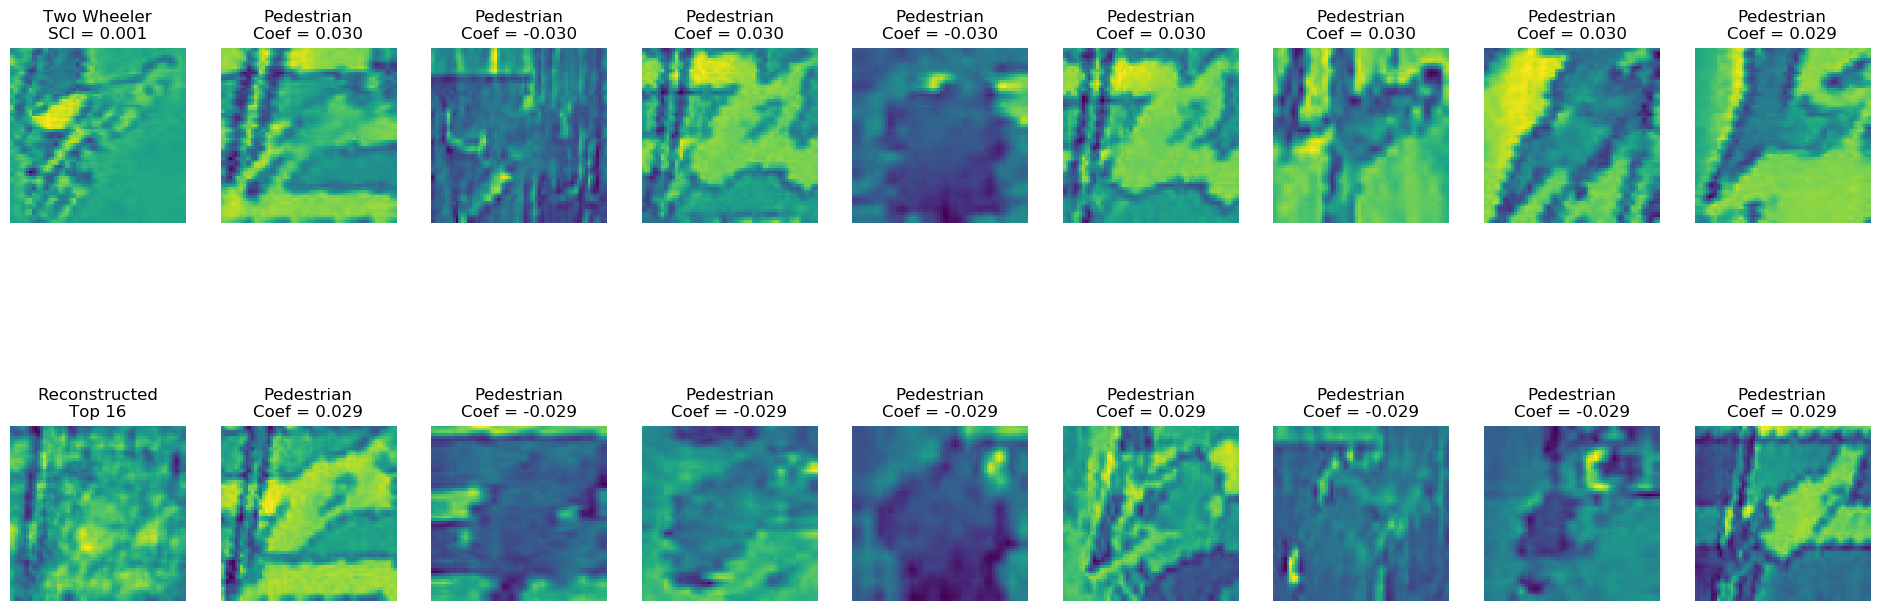

In [18]:
show_topk(x, D, Dl, y, yl, s, 54, 16)

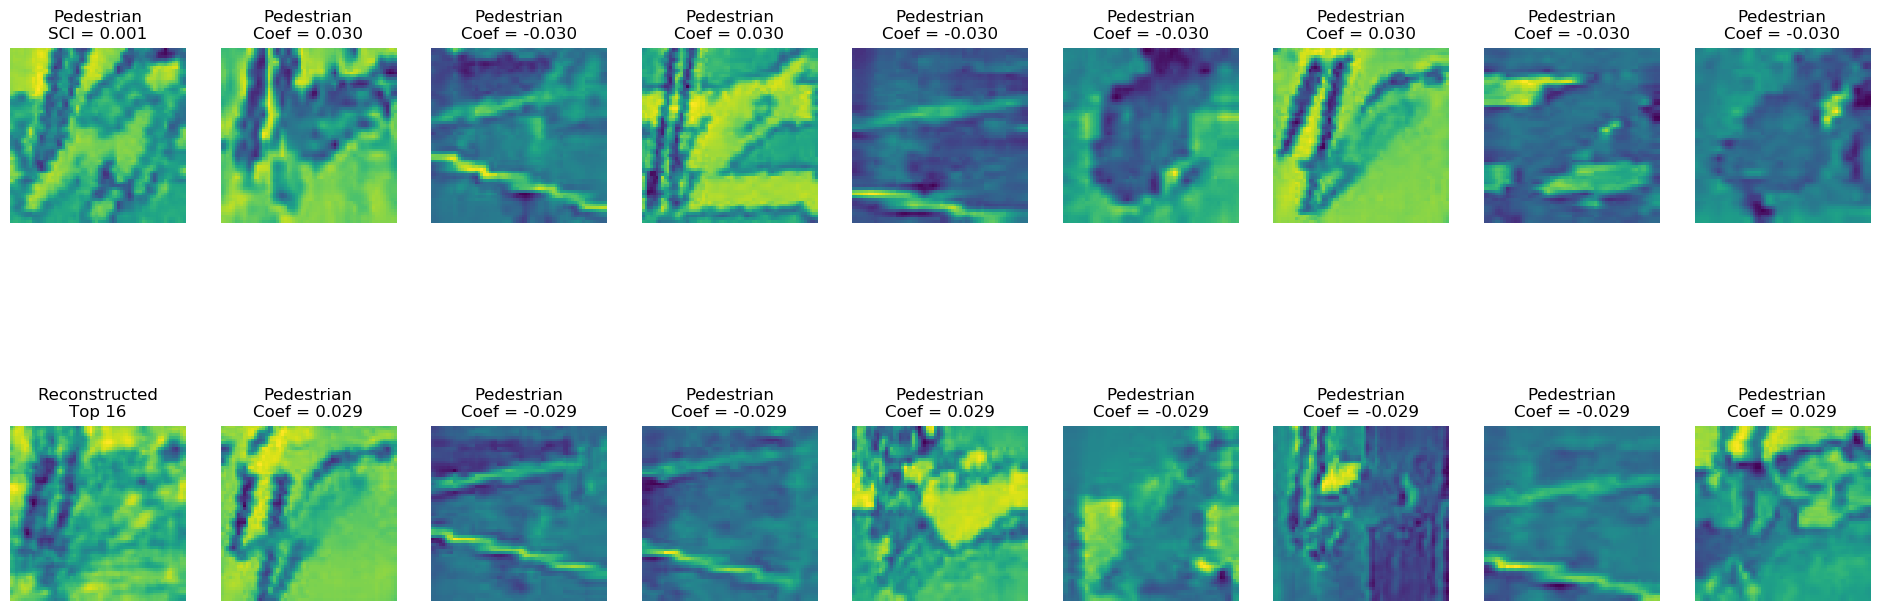

In [19]:
show_topk(x, D, Dl, y, yl, s, -10, 16)

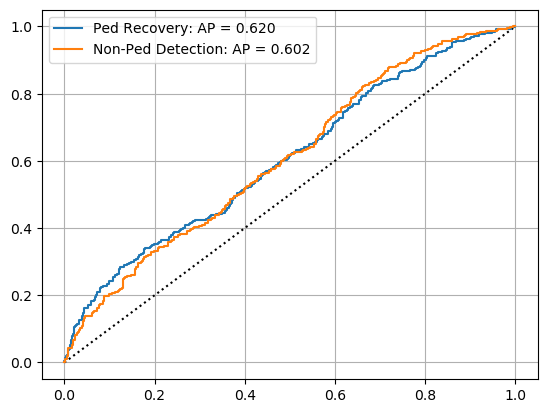

In [20]:
ss = s / s.max()
y_score = ss
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

y_true = y_ped
fpr1, tpr1, _ = roc_curve(y_true, y_score)
ap1 = average_precision_score(y_true, y_score)
plt.plot(fpr1, tpr1, label="Ped Recovery: AP = {:.3f}".format(ap1))

fpr2, tpr2, _ = roc_curve(~y_true, 1 - y_score)
ap2 = average_precision_score(~y_true, 1 - y_score)
plt.plot(fpr2, tpr2, label="Non-Ped Detection: AP = {:.3f}".format(ap2))

plt.legend()
plt.grid("on")

### Proximal Adam Optimizer

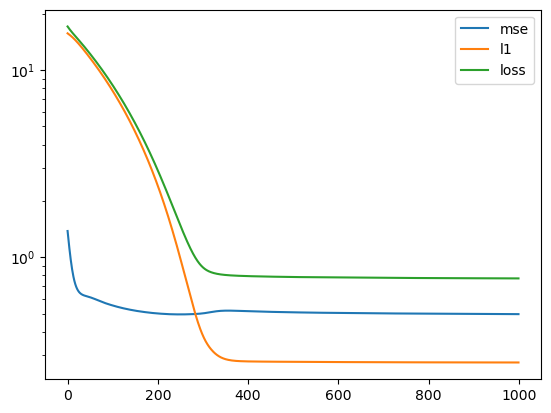

In [21]:
lasso = LASSO(optim="ProxAdam").fit(D)
x, hists = lasso.transform(y, 1e-3, 1000, lr=1e-4)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

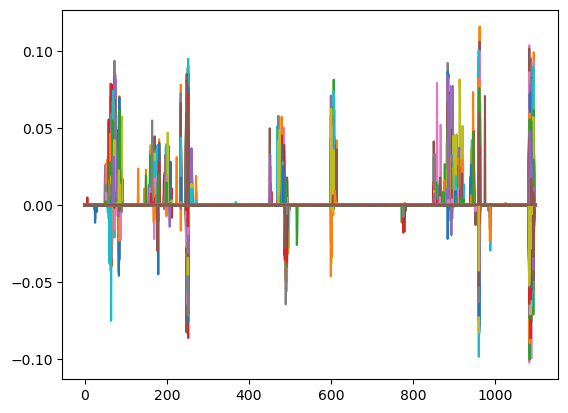

In [22]:
plt.plot(x.numpy().T)
plt.show()

Text(0, 0.5, 'SCI')

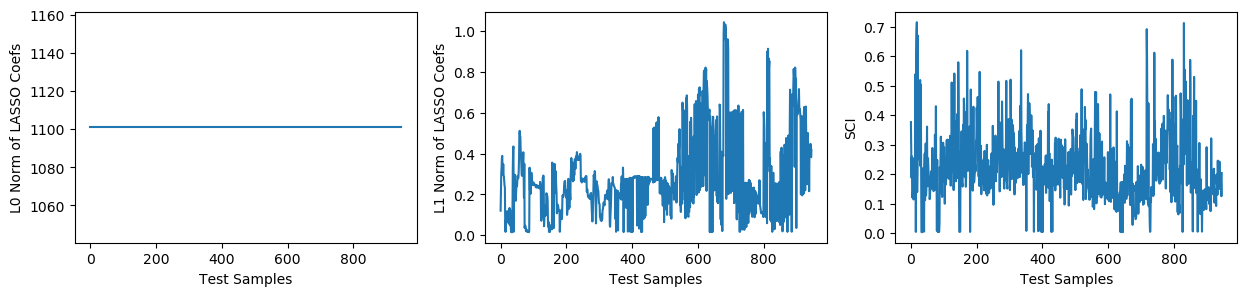

In [23]:
l0 = np.linalg.norm(x, ord=0, axis=1)
l1 = np.linalg.norm(x, ord=1, axis=1)
s = sci1(x.numpy())

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].plot(l0)
ax[0].set_xlabel("Test Samples")
ax[0].set_ylabel("L0 Norm of LASSO Coefs")
ax[1].plot(l1)
ax[1].set_xlabel("Test Samples")
ax[1].set_ylabel("L1 Norm of LASSO Coefs")
ax[2].plot(s)
ax[2].set_xlabel("Test Samples")
ax[2].set_ylabel("SCI")

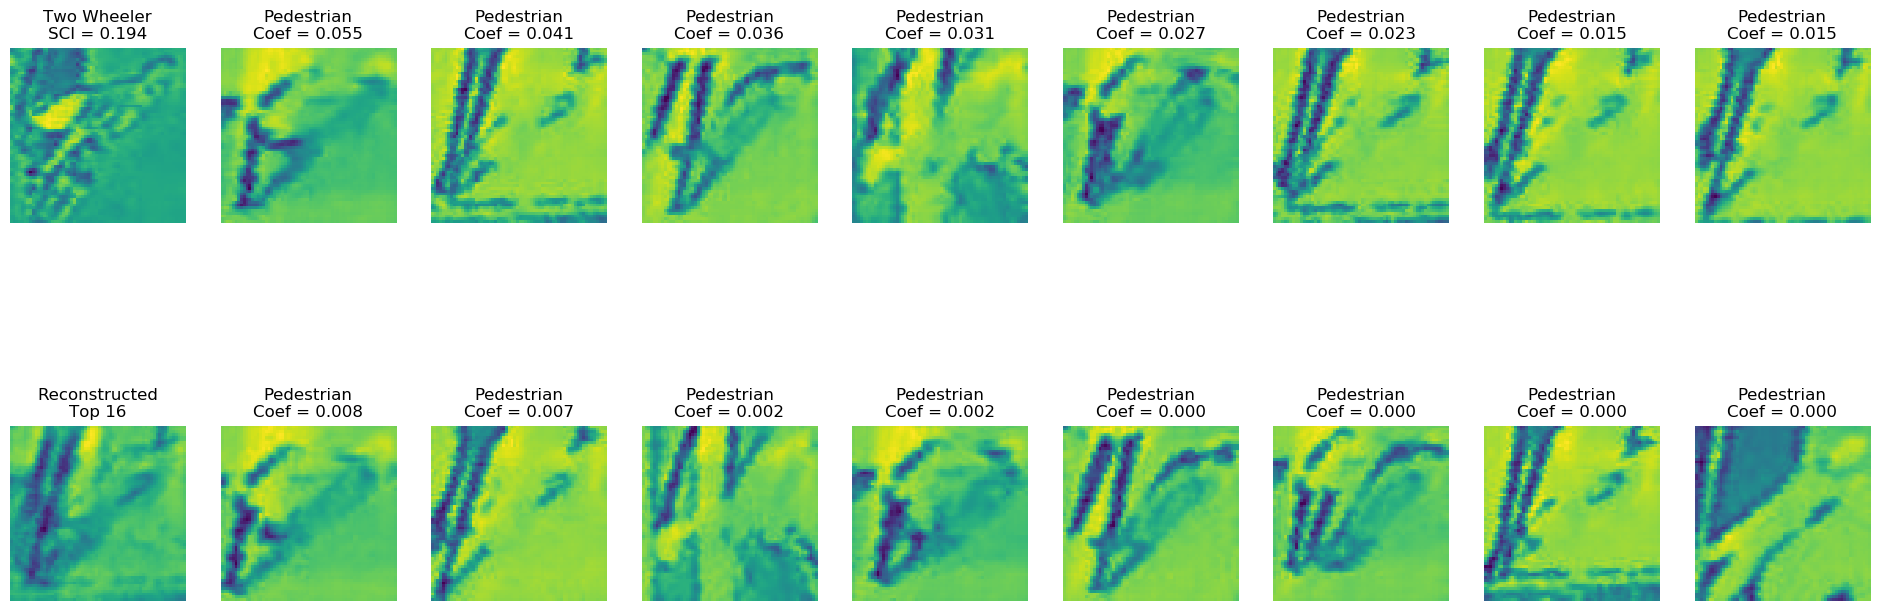

In [24]:
show_topk(x, D, Dl, y, yl, s, 54, 16)

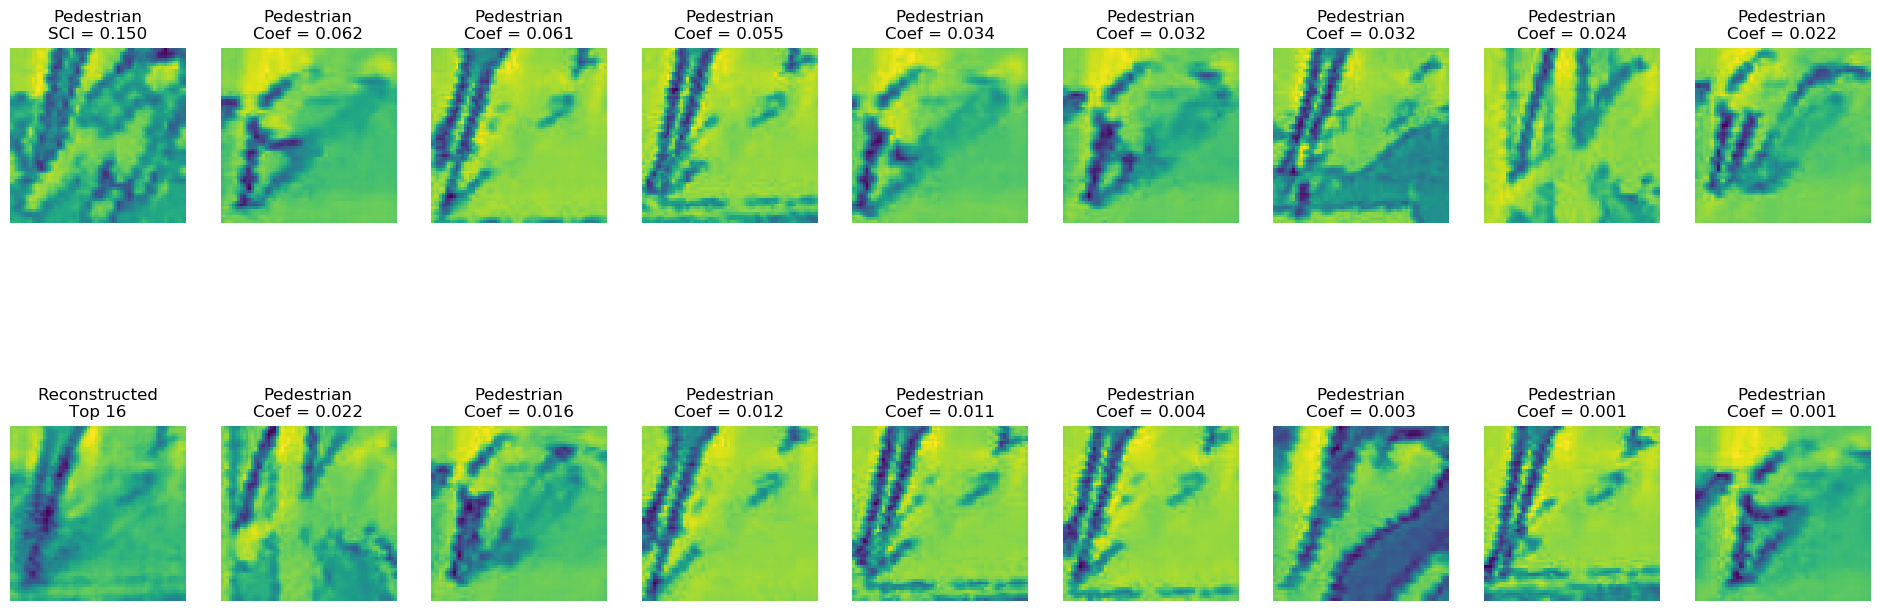

In [25]:
show_topk(x, D, Dl, y, yl, s, -10, 16)

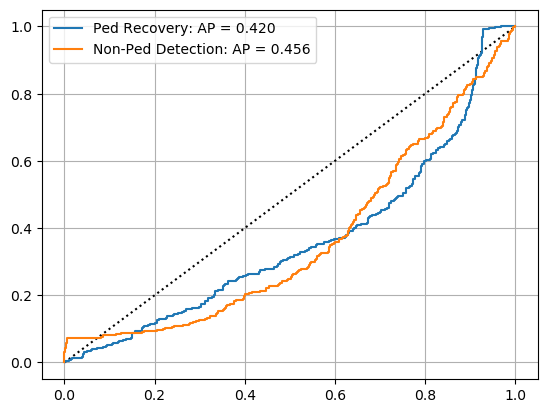

In [26]:
ss = s / s.max()
y_score = ss
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

y_true = y_ped
fpr1, tpr1, _ = roc_curve(y_true, y_score)
ap1 = average_precision_score(y_true, y_score)
plt.plot(fpr1, tpr1, label="Ped Recovery: AP = {:.3f}".format(ap1))

fpr2, tpr2, _ = roc_curve(~y_true, 1 - y_score)
ap2 = average_precision_score(~y_true, 1 - y_score)
plt.plot(fpr2, tpr2, label="Non-Ped Detection: AP = {:.3f}".format(ap2))

plt.legend()
plt.grid("on")

## ResNet Features with Dictionary Learning

### Proximal SGD Algorithm

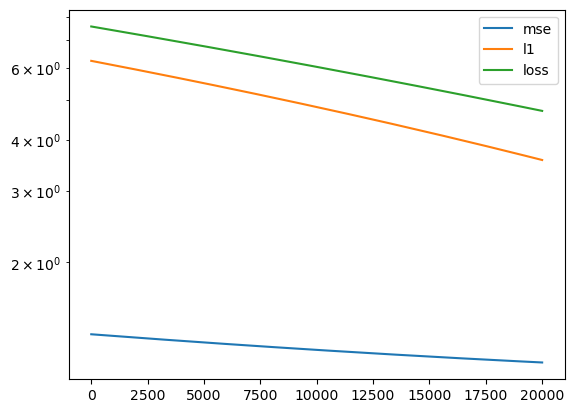

In [27]:
dict = DictLearn(128, "ProxSGD").fit(Df, 1e-3, 20000, lr=1e-3)
plt.plot(dict.hists["mse"], label="mse")
plt.plot(dict.hists["l1"], label="l1")
plt.plot(dict.hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

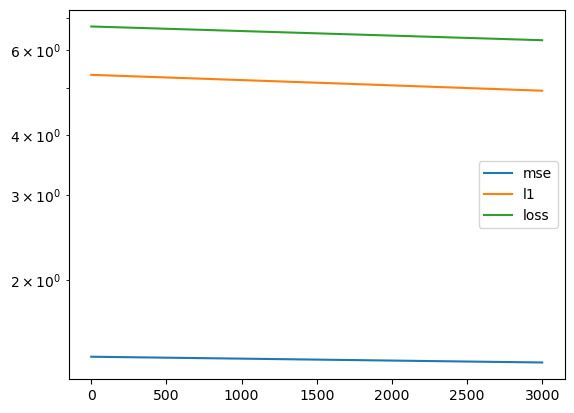

In [28]:
x, hists = dict.transform(yf, 1e-3, 3000, lr=1e-3)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

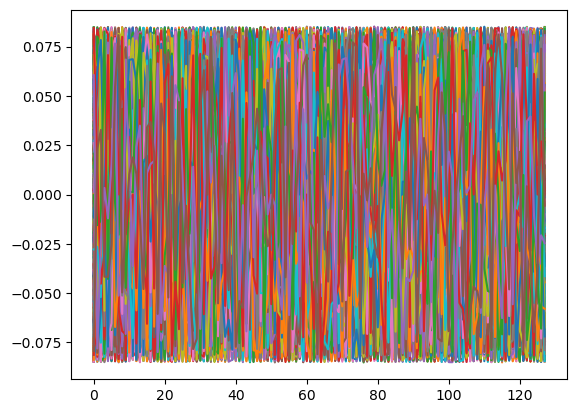

In [29]:
plt.plot(x.numpy().T)
plt.show()

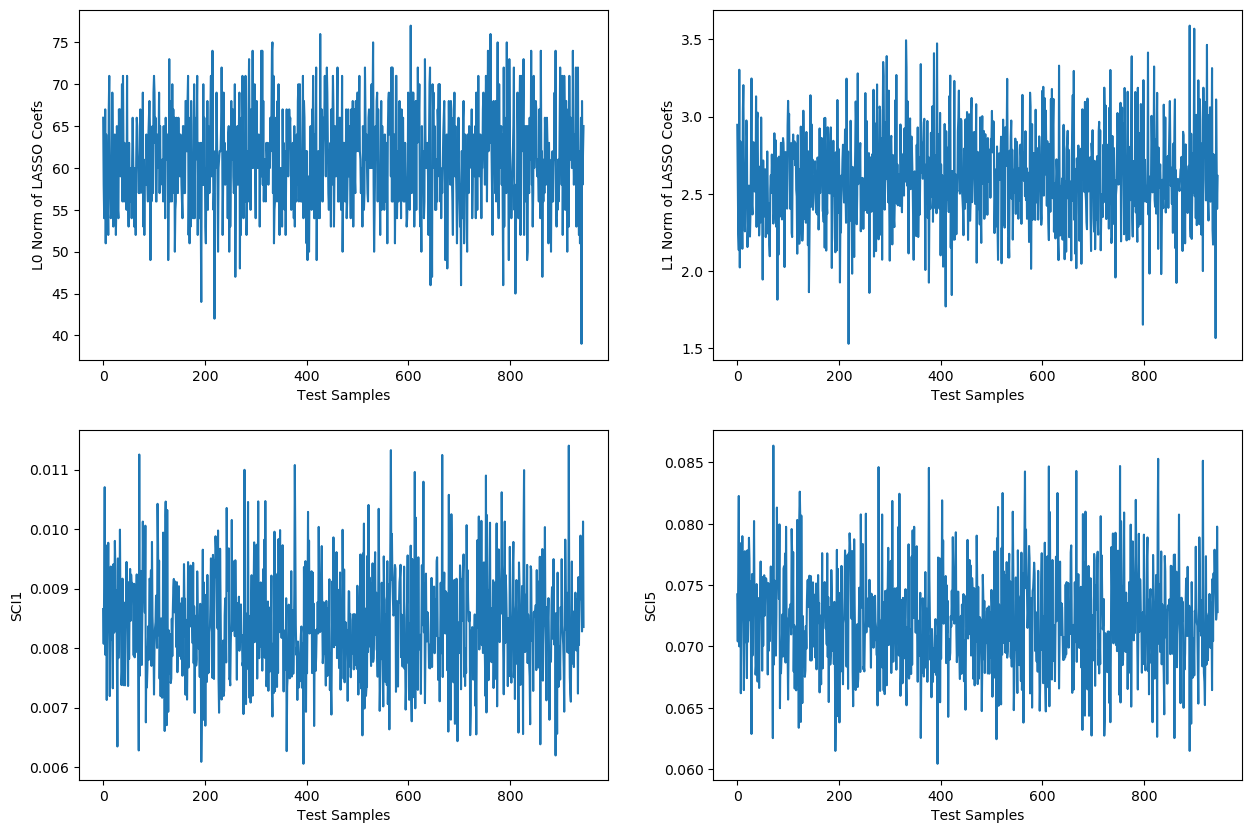

In [30]:
s1, s5 = show_sparsity(x.numpy())

Text(0, 0.5, 'TPR')

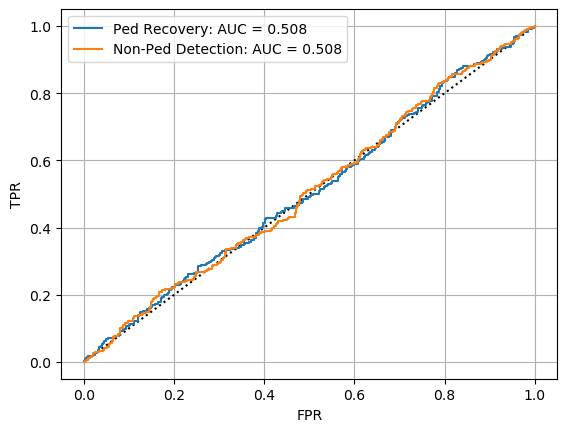

In [31]:
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

gt = y_ped
sc = s1
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Ped Recovery: AUC = {:.3f}".format(auc(fpr, tpr)))

gt = ~y_ped
sc = 1 - s5
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Non-Ped Detection: AUC = {:.3f}".format(auc(fpr, tpr)))

plt.legend()
plt.grid("on")
plt.xlabel("FPR")
plt.ylabel("TPR")

### Proximal Adam Optimizer

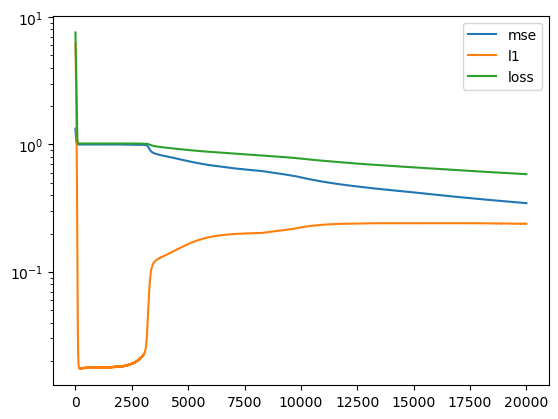

In [32]:
dict = DictLearn(128, "ProxAdam").fit(Df, 1e-3, 20000, lr=1e-3)
plt.plot(dict.hists["mse"], label="mse")
plt.plot(dict.hists["l1"], label="l1")
plt.plot(dict.hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

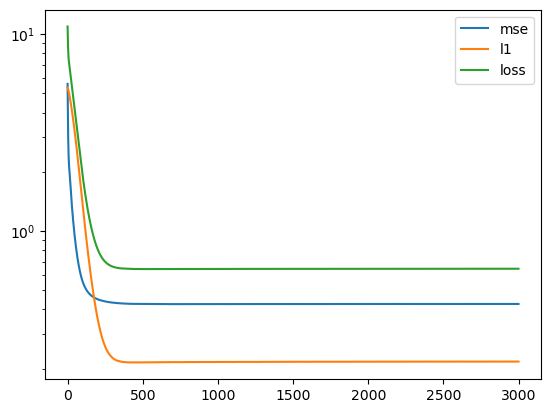

In [33]:
x, hists = dict.transform(yf, 1e-3, 3000, lr=1e-3)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

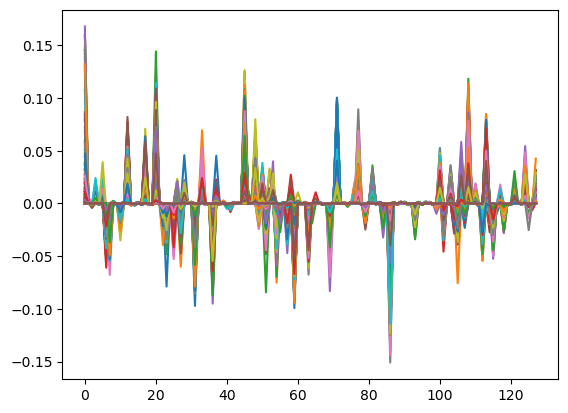

In [34]:
plt.plot(x.numpy().T)
plt.show()

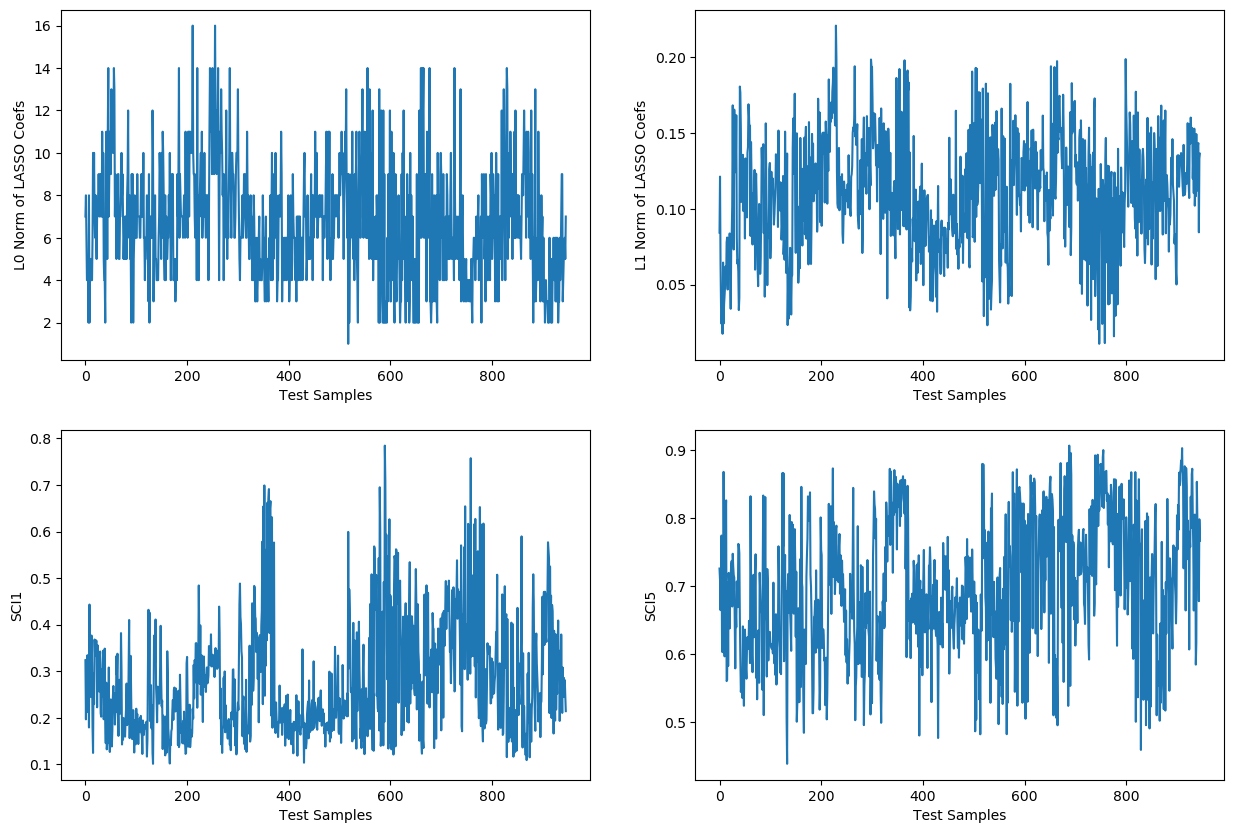

In [35]:
s1, s5 = show_sparsity(x.numpy())

Text(0, 0.5, 'TPR')

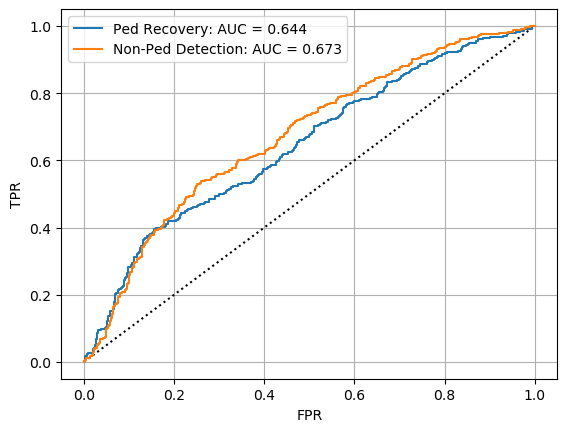

In [36]:
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

gt = y_ped
sc = s1
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Ped Recovery: AUC = {:.3f}".format(auc(fpr, tpr)))

gt = ~y_ped
sc = 1 - s5
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Non-Ped Detection: AUC = {:.3f}".format(auc(fpr, tpr)))

plt.legend()
plt.grid("on")
plt.xlabel("FPR")
plt.ylabel("TPR")

## Raw Images with Dictionary Learning

### Proximal SGD Algorithm

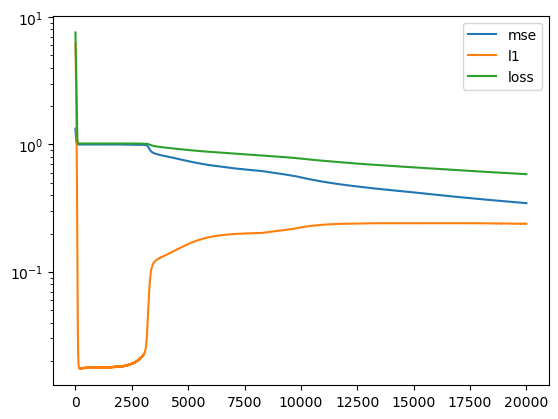

In [37]:
dict_ = DictLearn(32, "ProxSGD").fit(D, 1e-2, 20000, lr=1e-3)
plt.plot(dict.hists["mse"], label="mse")
plt.plot(dict.hists["l1"], label="l1")
plt.plot(dict.hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

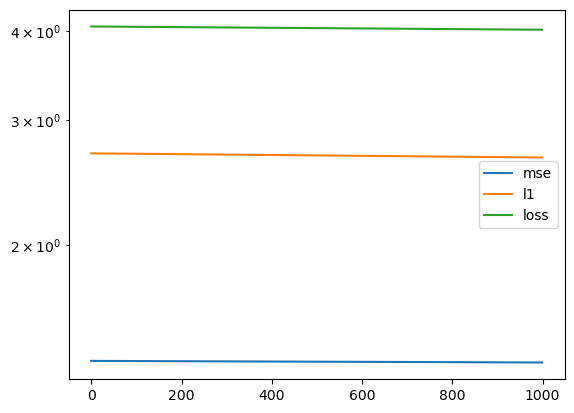

In [38]:
x, hists = dict_.transform(y, 1e-3, 1000, lr=1e-3)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

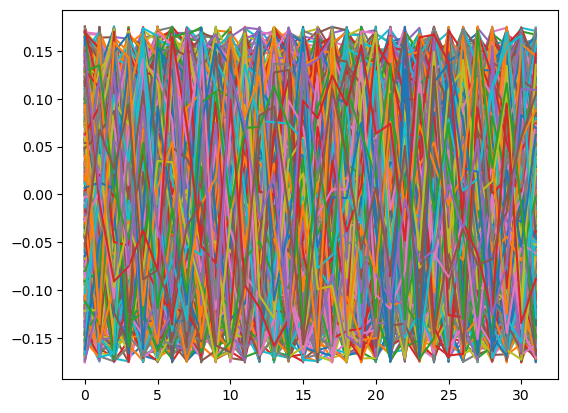

In [39]:
plt.plot(x.numpy().T)
plt.show()

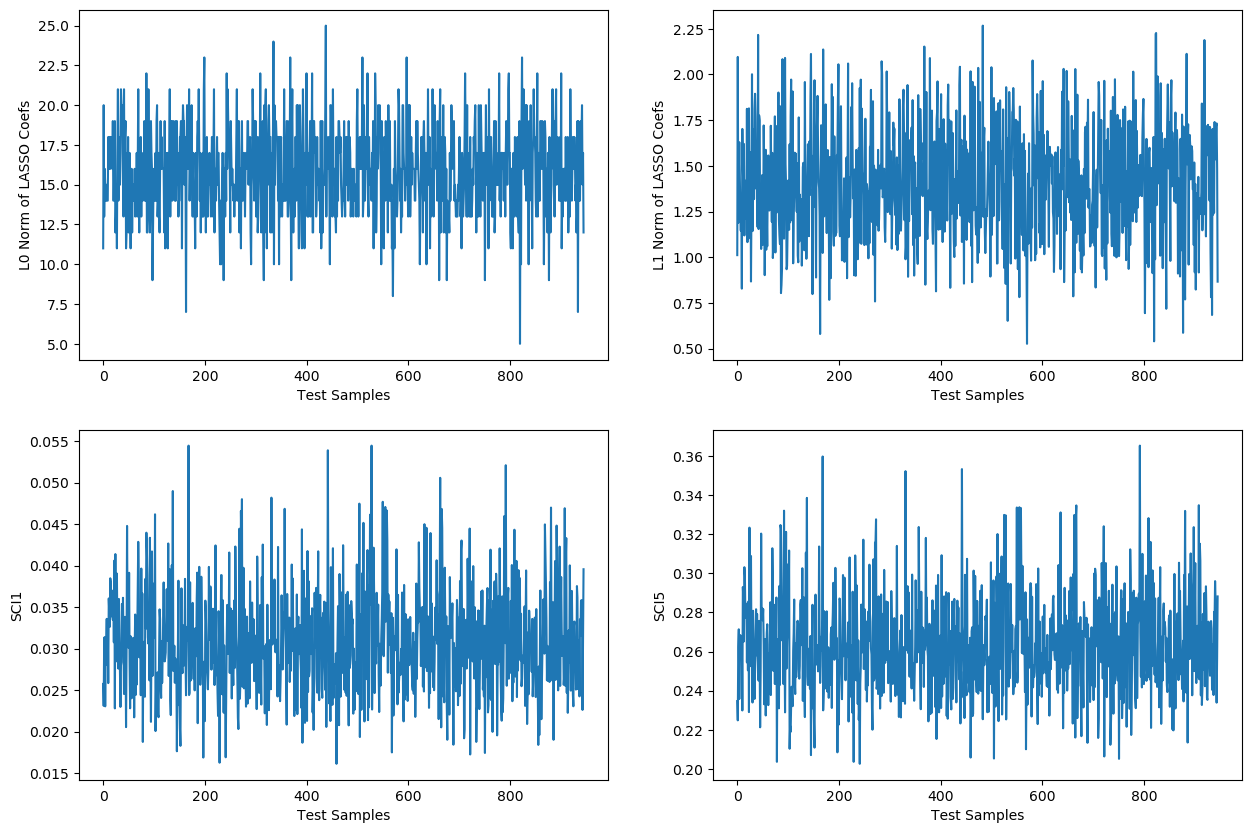

In [40]:
s1, s5 = show_sparsity(x.numpy())

[25 29 22 18 30 11  1 27 26  8 21  6 17 14  7 13]


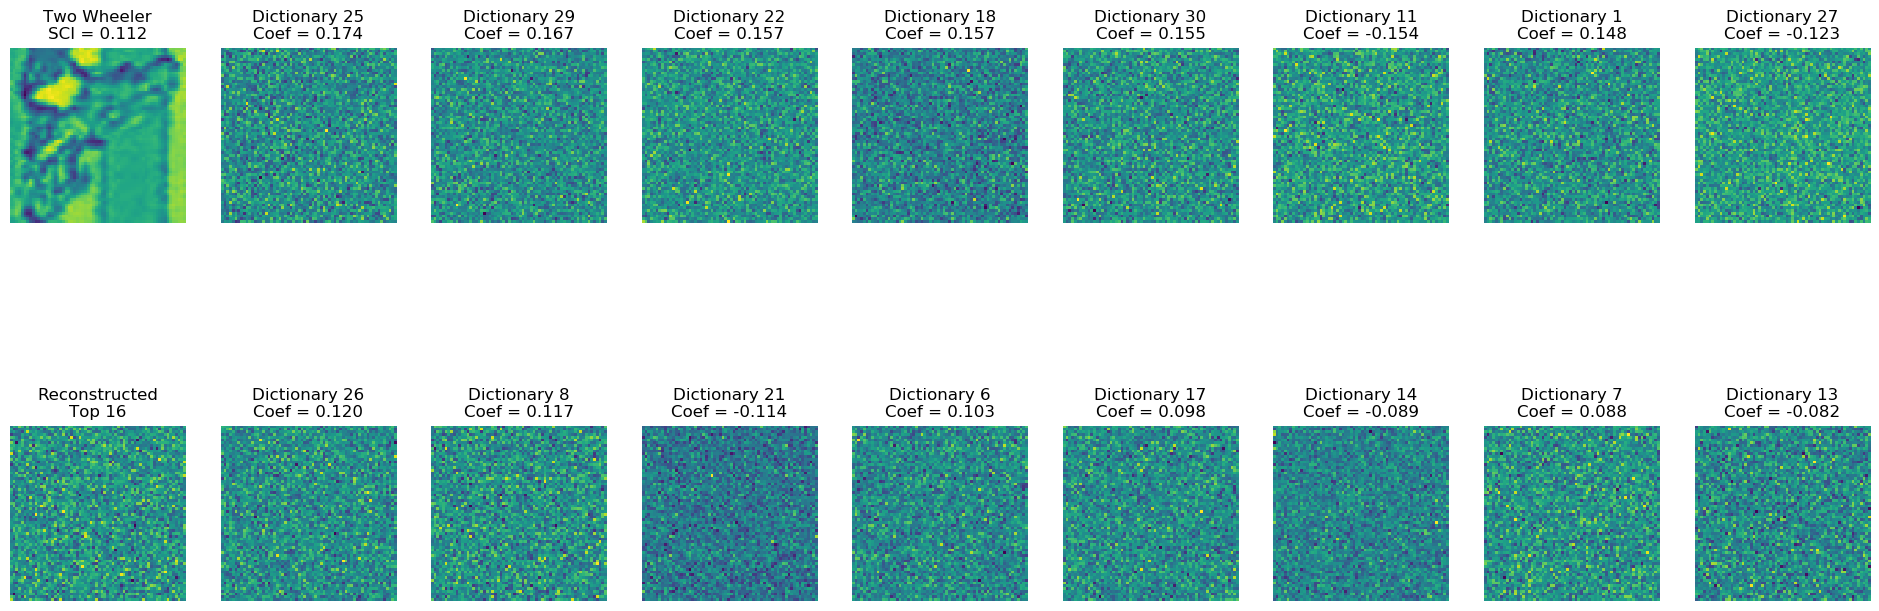

In [41]:
show_topd(dict_, x, y, yl, s, 43, 16)

[12  6  8 27 29  4 11 19 13 23  9 21  2 20 14 25]


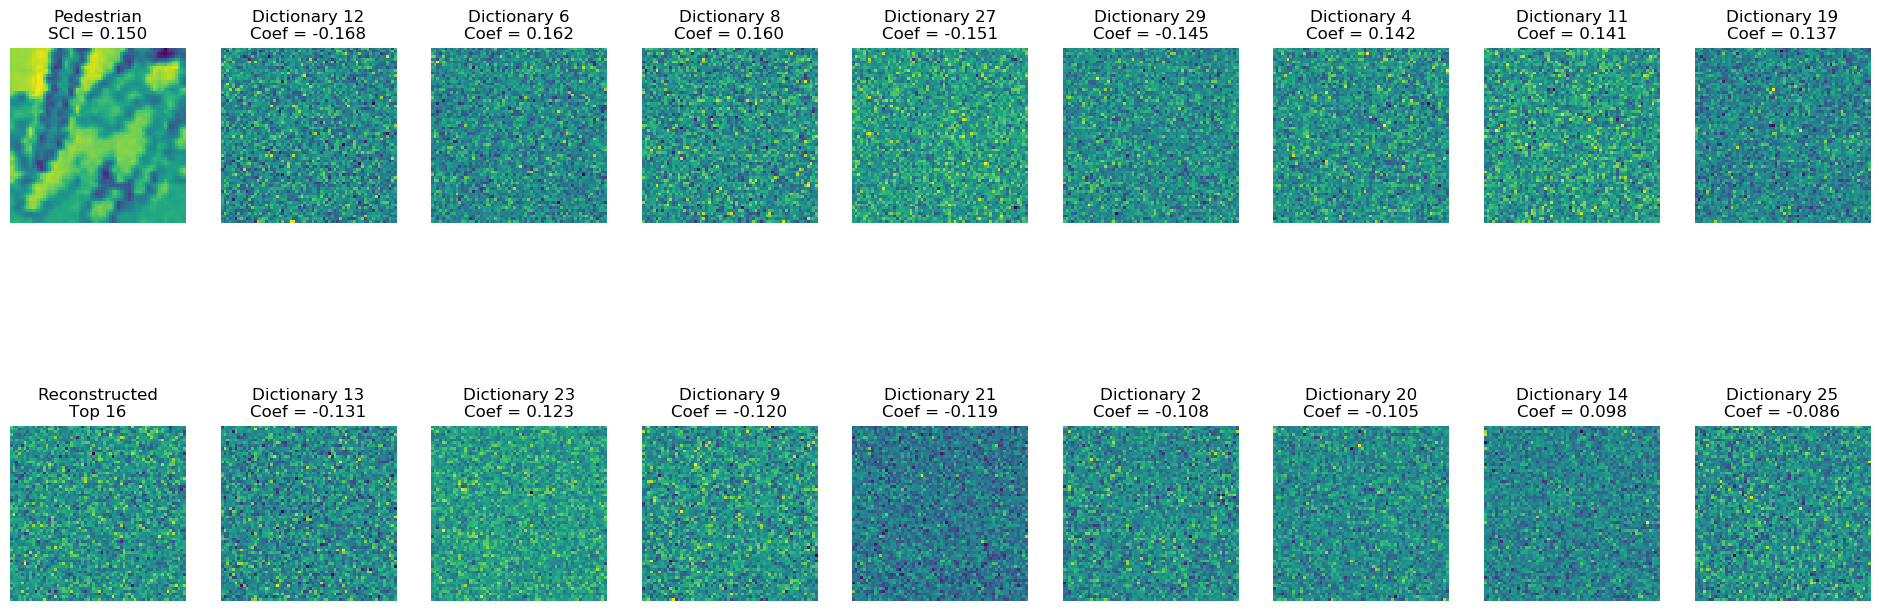

In [42]:
show_topd(dict_, x, y, yl, s, -10, 16)

Text(0, 0.5, 'TPR')

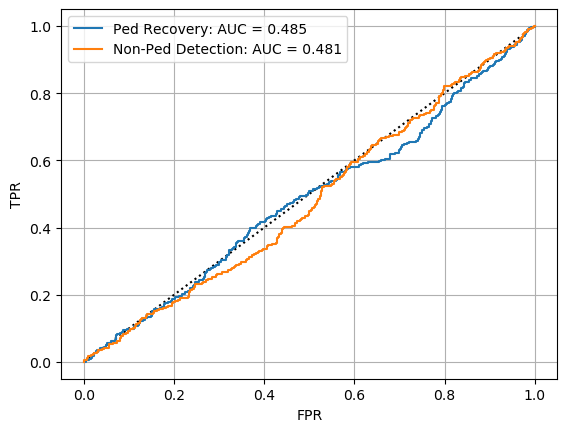

In [43]:
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

gt = y_ped
sc = s1
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Ped Recovery: AUC = {:.3f}".format(auc(fpr, tpr)))

gt = ~y_ped
sc = 1 - s5
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Non-Ped Detection: AUC = {:.3f}".format(auc(fpr, tpr)))

plt.legend()
plt.grid("on")
plt.xlabel("FPR")
plt.ylabel("TPR")

### Proximal Adam Algorithm

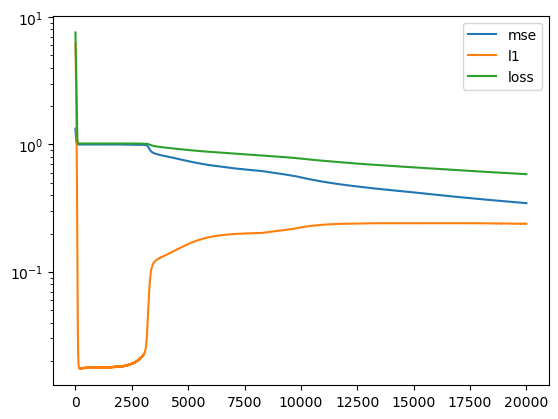

In [44]:
dict_ = DictLearn(32, "ProxAdam").fit(D, 1e-2, 20000, lr=1e-3)
plt.plot(dict.hists["mse"], label="mse")
plt.plot(dict.hists["l1"], label="l1")
plt.plot(dict.hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

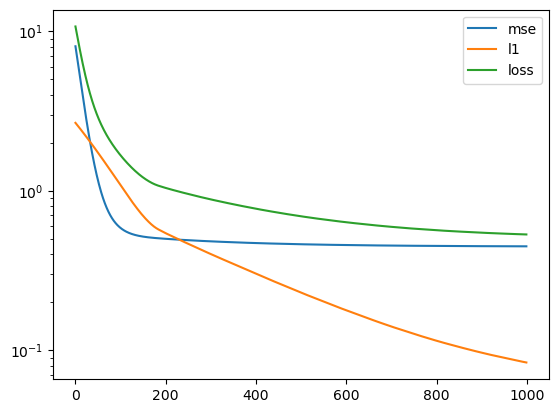

In [45]:
x, hists = dict_.transform(y, 1e-3, 1000, lr=1e-3)
plt.plot(hists["mse"], label="mse")
plt.plot(hists["l1"], label="l1")
plt.plot(hists["loss"], label="loss")
plt.legend()
plt.yscale("log")

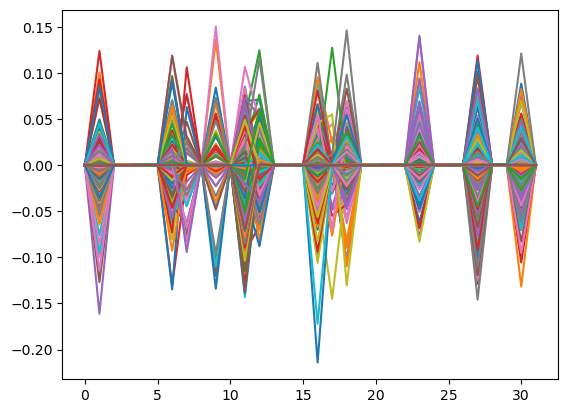

In [46]:
plt.plot(x.numpy().T)
plt.show()

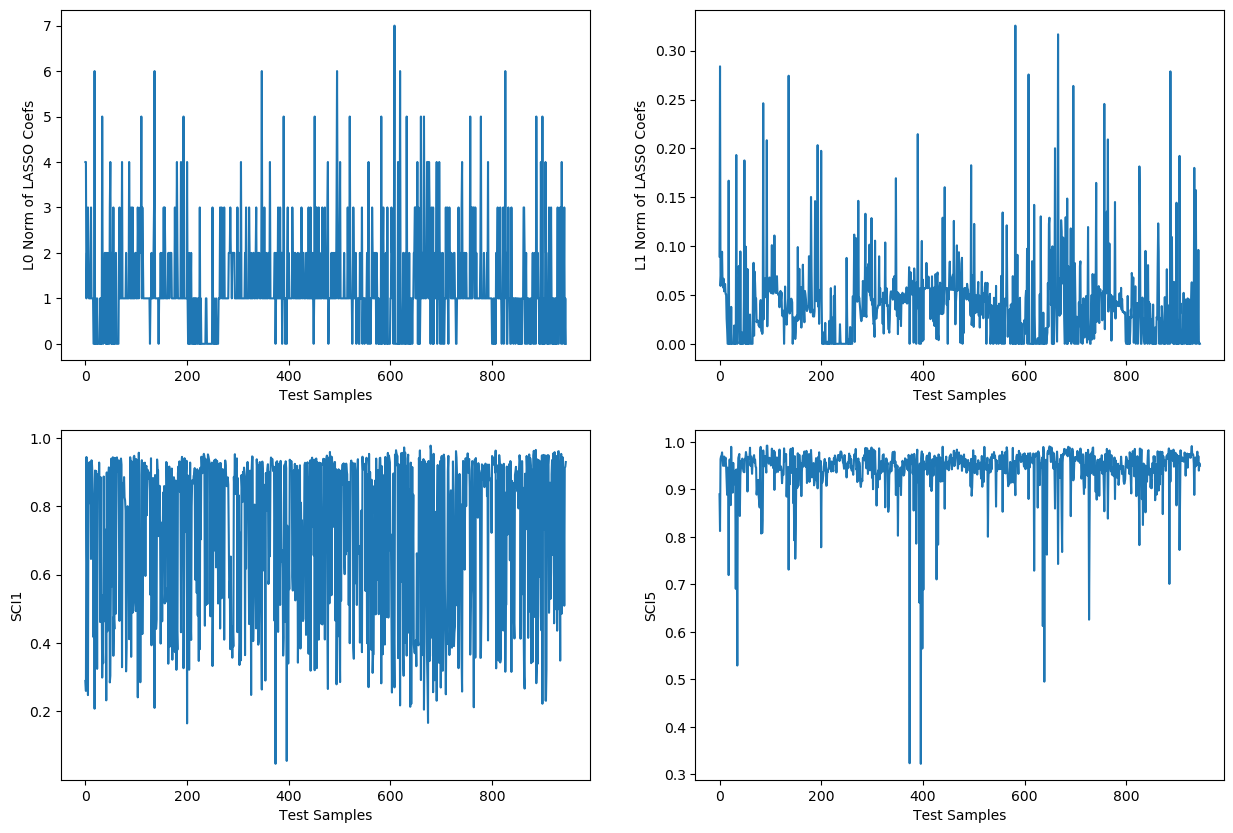

In [47]:
s1, s5 = show_sparsity(x.numpy())

[16 11 27  3 14 18 22  9  0 17 12  1  8  7 24 19]


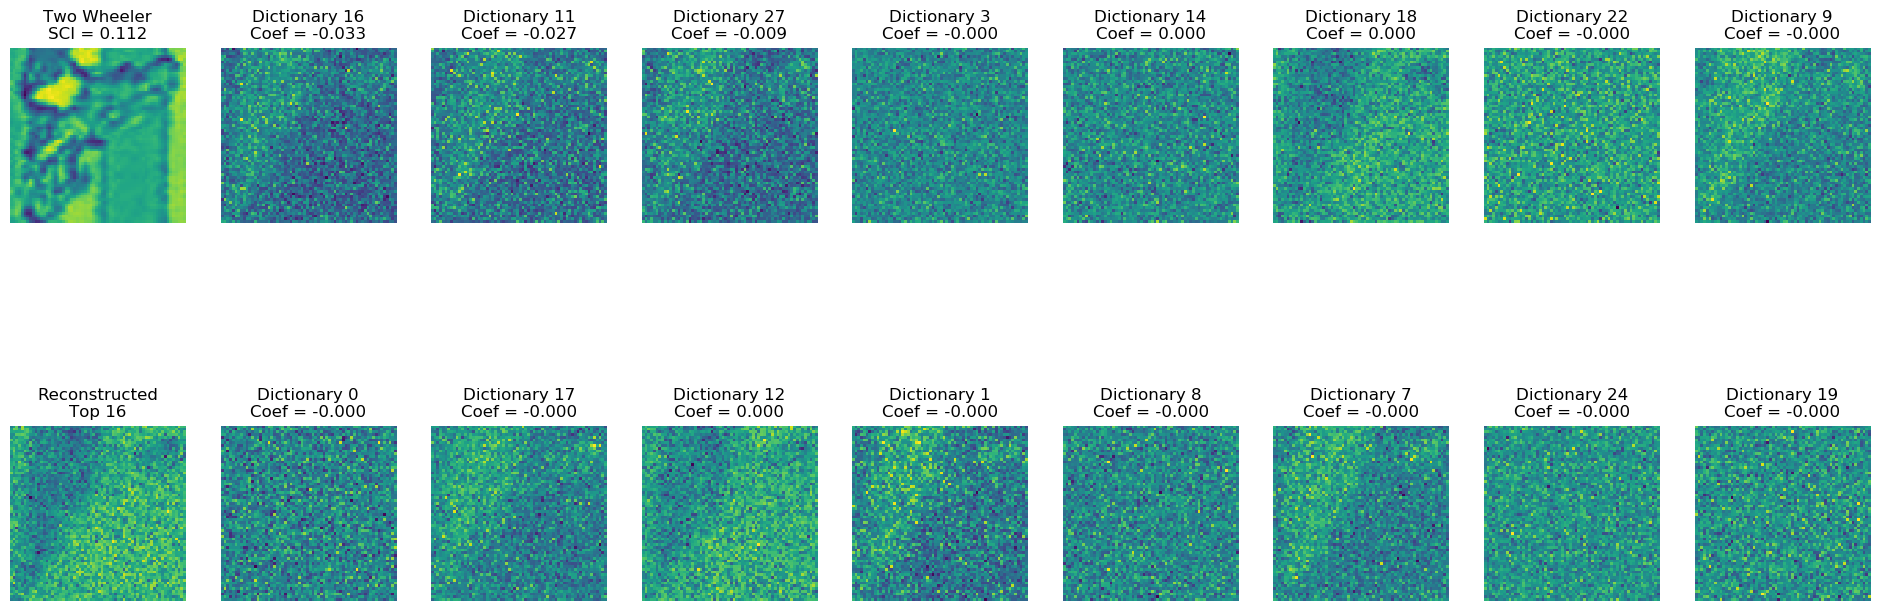

In [48]:
from utils import show_topd

show_topd(dict_, x, y, yl, s, 43, 16)

[11 31  0 20 24 26 17  8 15 18 19 29  5  4  6 12]


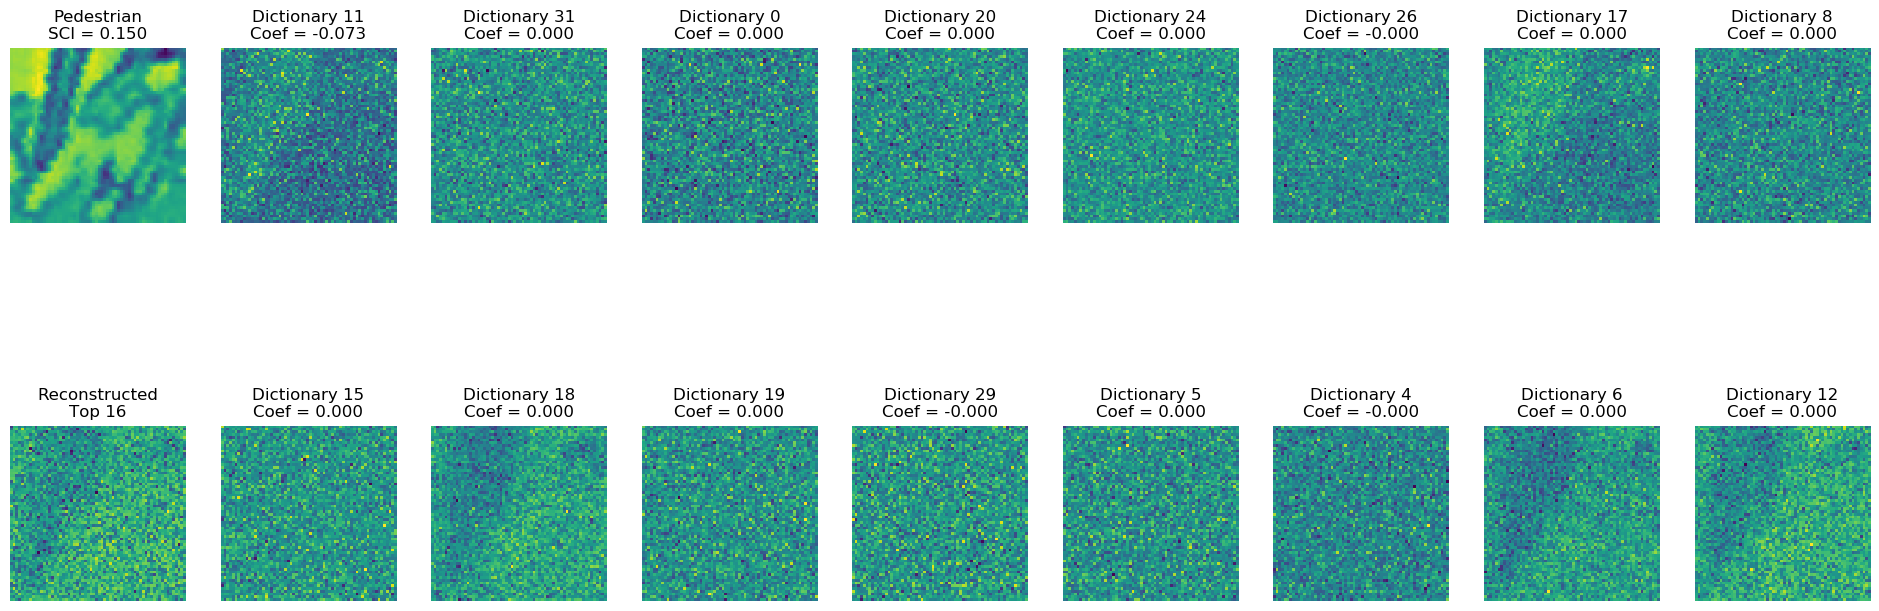

In [49]:
show_topd(dict_, x, y, yl, s, -10, 16)

Text(0, 0.5, 'TPR')

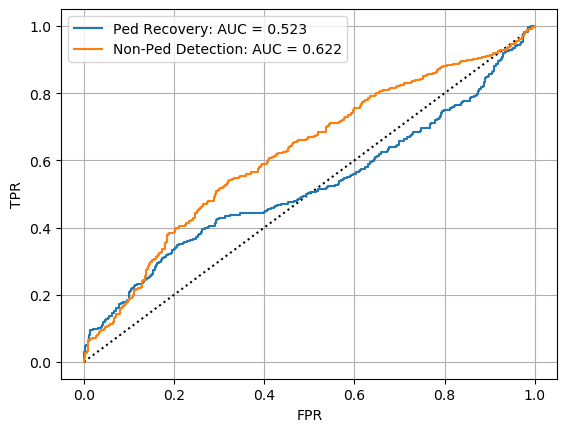

In [50]:
y_ped = yl[:] == 0

plt.plot([0, 1], [0, 1], "k:")

gt = y_ped
sc = s1
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Ped Recovery: AUC = {:.3f}".format(auc(fpr, tpr)))

gt = ~y_ped
sc = 1 - s5
fpr, tpr, _ = roc_curve(gt, sc)
plt.plot(fpr, tpr, label="Non-Ped Detection: AUC = {:.3f}".format(auc(fpr, tpr)))

plt.legend()
plt.grid("on")
plt.xlabel("FPR")
plt.ylabel("TPR")